In [11]:
import numpy as np 
import matplotlib.pyplot as plt 

path = '../ex2data2.txt'
X = []
Y = []

with open(path) as f:
    for line in f.read().splitlines():
        line = line.split(',')
        X.append([float(line[0]), float(line[1])])
        Y.append([int(line[2])])

X = np.array(X)
Y = np.array(Y)
print(X.shape)

(118, 2)


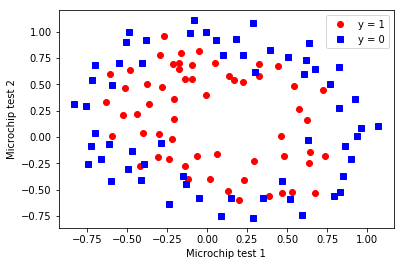

In [21]:
pos = np.where(Y == 1)[0]
neg = np.where(Y == 0)[0]

plt.plot(X[pos][:, 0], X[pos][:, 1], 'ro', label='y = 1')
plt.plot(X[neg][:, 0], X[neg][:, 1], 'bs', label='y = 0')
plt.legend()
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
# plt.axis([-1, 1, -1, 1])
plt.show()


In [31]:
x2min, x2max = X[neg][:, 0].min() - 1, X[neg][:, 0].max() + 1
ymin, ymax= X[neg][:, 1].min() - 1, X[neg][:, 1].max() + 1
print(x2min, x2max)
print(ymin, ymax)

-1.83007 2.0709
-1.76974 2.1089


In [33]:
print(w_op.shape)

(28, 1)


In [37]:
xx, yy = np.meshgrid(np.arange(x2min, x2max, .02), np.arange(ymin, ymax, .02))
z = np.argmax(X_train.dot(w_op), axis=1)
# print(z.shape)
z = z.reshape(xx.shape)

ValueError: cannot reshape array of size 118 into shape (194,196)

m = X.shape[0]

x1 = X[:,0]
x2 = X[:,1]
def mapFeature(x1, x2):
    k = x1.shape[0]
    deg = 6
    X_train = np.ones((k, 1))
    for i in range(1, deg+1):
        for j in range(i+1):
            X_train = np.hstack((X_train, ((x1**(i-j))*(x2**j)).reshape(k,1)))
# print(X_train.shape)
    return X_train
X_train = mapFeature(x1, x2)
m = X_train.shape[0]
n = X_train.shape[1]
# print(n)

In [14]:
def predict(w):
    z = X_train.dot(w)
    return 1 / (1 + np.exp(-z))

def GD(w_init, lr, ite, alpha):
    w = w_init
    for it in range(ite):
        w[0] = w[0] - lr*X_train[:,0].dot(predict(w)- Y)
        for i in range(1, n):
            w[i] = w[i] - lr*(X_train[:, i].dot(predict(w) - Y)/m + alpha*w[i]/m)
        if it%1000 == 0:
            print(np.abs(predict(w) - Y).mean())
    return w

In [15]:
lr = .1
alpha = .5
ite = 10000
w_init = np.zeros((n,1)).reshape((n,1))
w_op = GD(w_init, lr, ite, alpha)
print(np.abs(predict(w_op) - Y).mean())


0.4990116323789129
0.39151879433269016
0.34865286748274404
0.33800385266997335
0.33522629823855216
0.33434190745932574
0.3340189462630349
0.33388692909288986
0.33382704175329203
0.3337973419084334
0.31615361318478447


(25, 25)


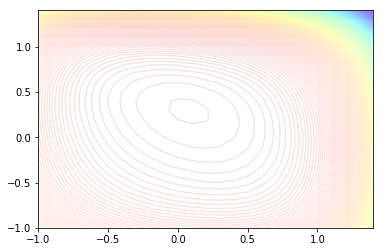

In [16]:
u = np.arange(-1, 1.5, .1)
v = np.arange(-1, 1.5, .1)
xx, yy = np.meshgrid(u, v)
# z = np.zeros((len(u), len(v)))
# print(xx.shape)
xx1 = xx.ravel().reshape(xx.size, 1)
yy1 = yy.ravel().reshape(yy.size, 1)
x0 = mapFeature(xx1, yy1)
# print(x0.shape)
z0 = x0.dot(w_op)
z0 = z0.reshape(xx.shape)
print(z0.shape)
plt.contour(xx, yy, z0, 200, cmap='jet', alpha=.1)
plt.show()
